# Regression - single workload type

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

## Linpack 12x20min

In [2]:
experiment_name = 'linpack_1_linpack_11'

path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']

df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606609932,NaN,74.4316,0.013435,2519.5,1.556021e+10,1.0
1,1606610019,NaN,75.0075,0.013332,2502.0,1.556304e+10,1.0
2,1606610105,NaN,75.8662,0.013181,2450.0,1.546324e+10,1.0
3,1606610189,NaN,77.2404,0.012947,2332.0,1.545943e+10,1.0
4,1606610273,NaN,77.2766,0.012941,2359.5,1.545954e+10,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     645.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           2.05e-51
Time:                        15:14:02   Log-Likelihood:                -426.76
No. Observations:                 128   AIC:                             857.5
Df Residuals:                     126   BIC:                             863.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      88.3029      1.191     74.124      

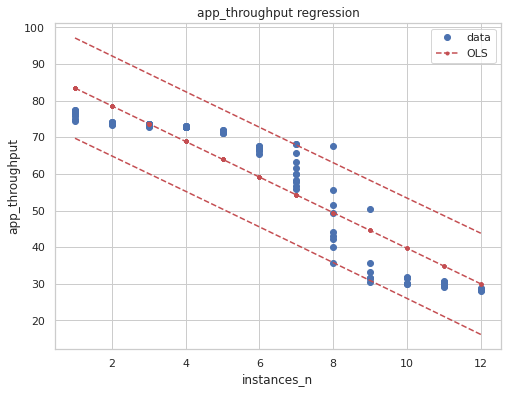

In [3]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     649.9
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.43e-51
Time:                        15:14:02   Log-Likelihood:                -426.39
No. Observations:                 128   AIC:                             856.8
Df Residuals:                     126   BIC:                             862.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.2399      1.219     73.195      0.0

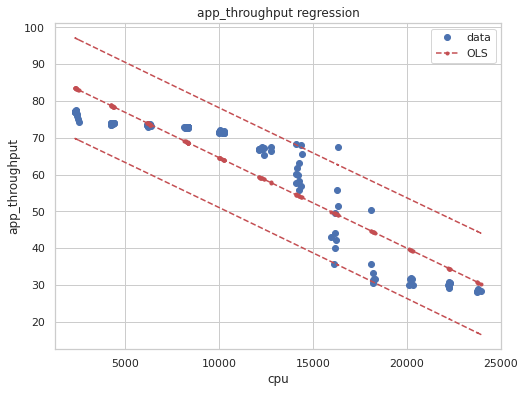

In [4]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')
print(results.summary())

### `app_throughput` ~ `instances_n` + `cpu`

In [5]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     322.9
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.22e-50
Time:                        15:14:02   Log-Likelihood:                -426.31
No. Observations:                 128   AIC:                             858.6
Df Residuals:                     125   BIC:                             867.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      89.9347      2.109     42.650      

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     384.4
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.31e-40
Time:                        15:14:02   Log-Likelihood:                 536.35
No. Observations:                 128   AIC:                            -1069.
Df Residuals:                     126   BIC:                            -1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0072      0.001     11.139      

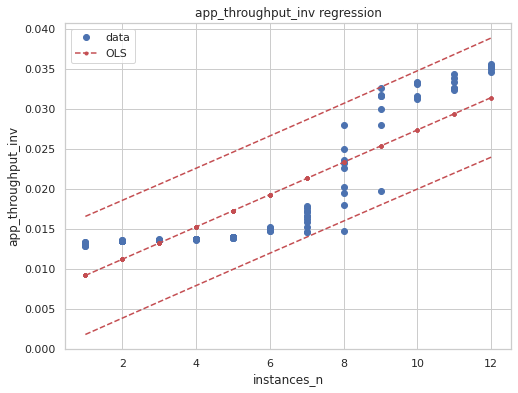

In [6]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     384.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.36e-40
Time:                        15:14:02   Log-Likelihood:                 536.34
No. Observations:                 128   AIC:                            -1069.
Df Residuals:                     126   BIC:                            -1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0068      0.001     10.270      0.0

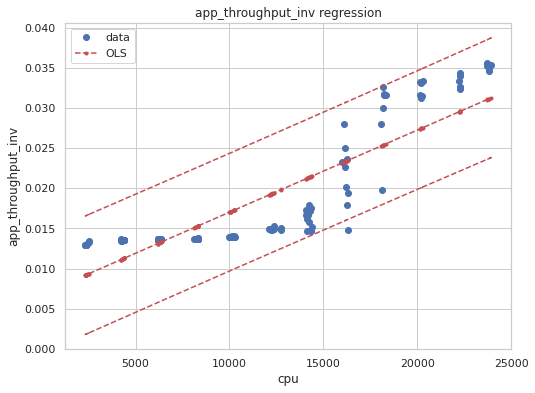

In [7]:
results = fit_regression(data=df, formula='app_throughput_inv ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='cpu')
print(results.summary())

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.855e+05
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          2.87e-213
Time:                        15:14:03   Log-Likelihood:                -805.82
No. Observations:                 128   AIC:                             1616.
Df Residuals:                     126   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     377.1654     23.022     16.383      

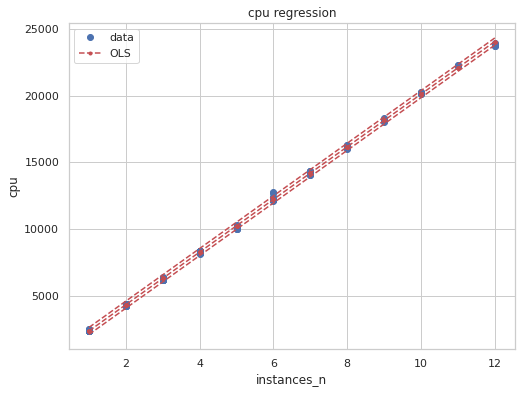

In [8]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')
print(results.summary())

## Redis YCSB 12x20min

In [9]:
experiment_name = 'redis_ycsb_1_redis_ycsb_11'

path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']

df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606626773,0.059201,15423.107242,0.000065,1304.0,1.463669e+10,1.0
1,1606626837,0.058712,15429.188596,0.000065,1285.0,1.403681e+10,1.0
2,1606626901,0.058027,15491.066818,0.000065,1281.0,1.401955e+10,1.0
3,1606626965,0.059132,15455.685116,0.000065,1297.0,1.402157e+10,1.0
4,1606627029,0.058956,15479.077447,0.000065,1301.0,1.400061e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     7738.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          2.00e-162
Time:                        15:14:03   Log-Likelihood:                 1005.3
No. Observations:                 203   AIC:                            -2007.
Df Residuals:                     201   BIC:                            -2000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0575      0.000    237.516      

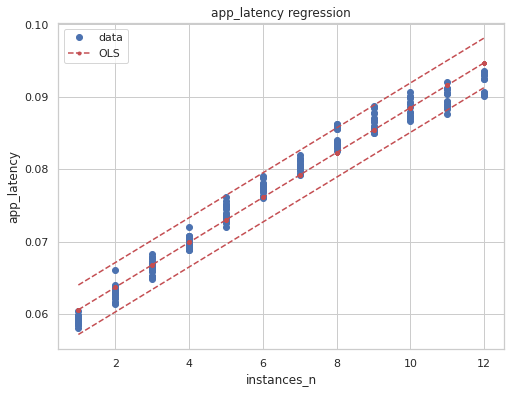

In [10]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     8173.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          9.41e-165
Time:                        15:14:03   Log-Likelihood:                 1010.7
No. Observations:                 203   AIC:                            -2017.
Df Residuals:                     201   BIC:                            -2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0562      0.000    225.908      0.0

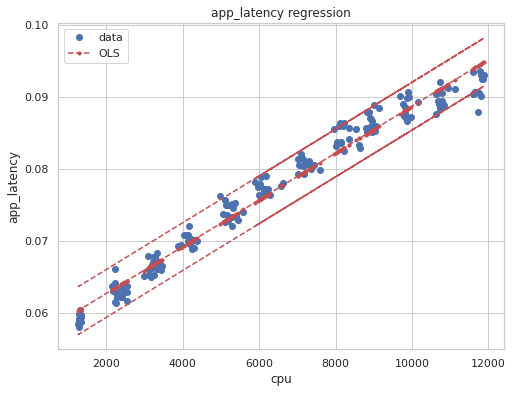

In [11]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [12]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4136.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          2.01e-163
Time:                        15:14:04   Log-Likelihood:                 1012.4
No. Observations:                 203   AIC:                            -2019.
Df Residuals:                     200   BIC:                            -2009.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0566      0.000    167.879      

### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     3281.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.88e-126
Time:                        15:14:04   Log-Likelihood:                -1518.0
No. Observations:                 203   AIC:                             3040.
Df Residuals:                     201   BIC:                             3047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.525e+04     60.596    251.703      

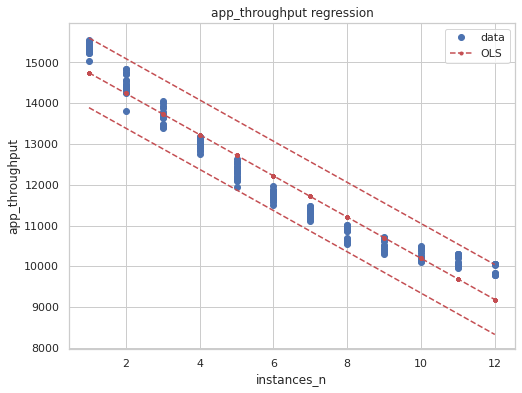

In [13]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     3514.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          2.81e-129
Time:                        15:14:04   Log-Likelihood:                -1511.5
No. Observations:                 203   AIC:                             3027.
Df Residuals:                     201   BIC:                             3034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.548e+04     61.868    250.130      0.0

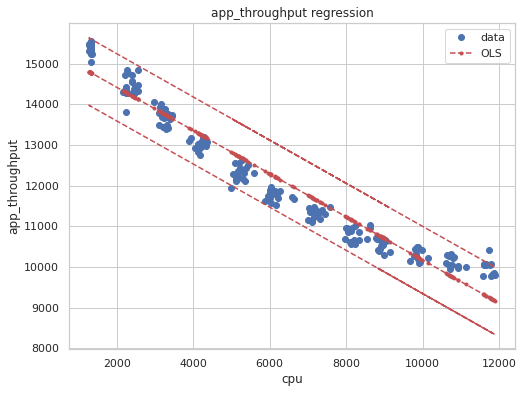

In [14]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')
print(results.summary())

### `app_throughput` ~ `instances_n` + `cpu`

In [15]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1748.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          2.09e-127
Time:                        15:14:04   Log-Likelihood:                -1511.5
No. Observations:                 203   AIC:                             3029.
Df Residuals:                     200   BIC:                             3039.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.547e+04     84.579    182.961      

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     8208.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          6.19e-165
Time:                        15:14:04   Log-Likelihood:                 2395.9
No. Observations:                 203   AIC:                            -4788.
Df Residuals:                     201   BIC:                            -4781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.322e-05   2.57e-07    246.443      

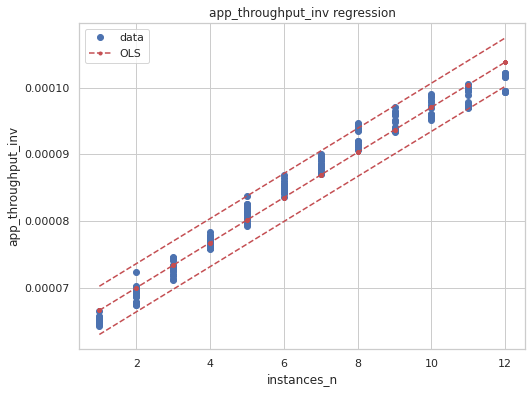

In [16]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     8533.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.37e-166
Time:                        15:14:04   Log-Likelihood:                 2399.7
No. Observations:                 203   AIC:                            -4795.
Df Residuals:                     201   BIC:                            -4789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.176e-05   2.65e-07    232.661      0.0

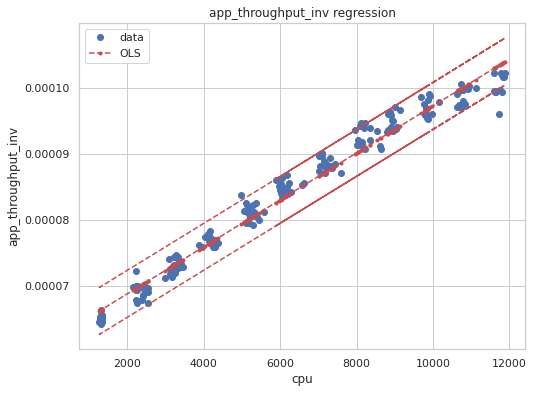

In [17]:
results = fit_regression(data=df, formula='app_throughput_inv ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='cpu')
print(results.summary())

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 5.208e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.08e-244
Time:                        15:14:04   Log-Likelihood:                -1366.2
No. Observations:                 203   AIC:                             2736.
Df Residuals:                     201   BIC:                             2743.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     420.2322     28.680     14.652      

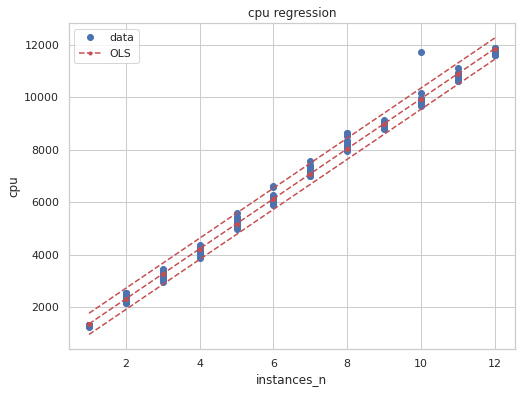

In [18]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')
print(results.summary())

## Hadoop 10x20min

In [37]:
experiment_name = 'hadoop_1_hadoop_9'

path = list(get_experiments_paths(experiment_name, experiments_path))[0]
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)
df['app_throughput_inv'] = 1./ df['app_throughput']

df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606727781,52639.0,0,inf,1751.5,1.514173e+10,1.0
1,1606727890,51743.0,0,inf,2094.0,1.573442e+10,1.0
2,1606727998,51766.0,0,inf,1423.0,1.538033e+10,1.0
3,1606728108,51581.0,0,inf,1556.0,1.544899e+10,1.0
4,1606728218,52580.0,0,inf,1836.0,1.544343e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     211.2
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.17e-31
Time:                        15:15:39   Log-Likelihood:                -1567.3
No. Observations:                 163   AIC:                             3139.
Df Residuals:                     161   BIC:                             3145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      5.2e+04    608.683     85.423      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


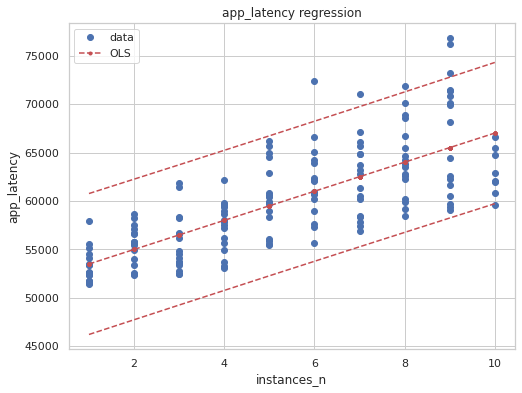

In [38]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     136.7
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.00e-23
Time:                        15:15:44   Log-Likelihood:                -1585.5
No. Observations:                 163   AIC:                             3175.
Df Residuals:                     161   BIC:                             3181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.275e+04    682.768     77.262      0.0

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


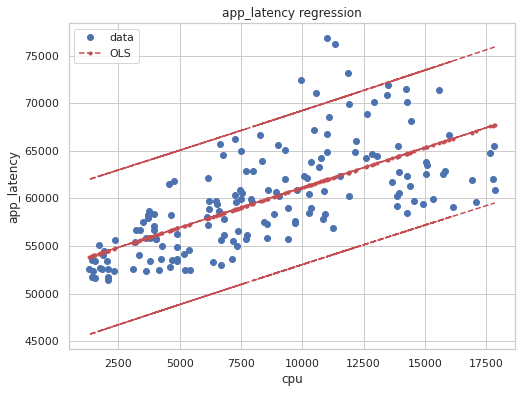

In [39]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [40]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     127.9
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           6.53e-34
Time:                        15:15:49   Log-Likelihood:                -1557.7
No. Observations:                 163   AIC:                             3121.
Df Residuals:                     160   BIC:                             3131.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.231e+04    580.236     90.157      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2566.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          7.81e-101
Time:                        15:16:14   Log-Likelihood:                -1370.3
No. Observations:                 163   AIC:                             2745.
Df Residuals:                     161   BIC:                             2751.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     284.7887    181.813      1.566      

/home/godul/.local/lib/python3.7/site-packages/numpy/core/_methods.py:249: RuntimeWarning: invalid value encountered in subtract
  out


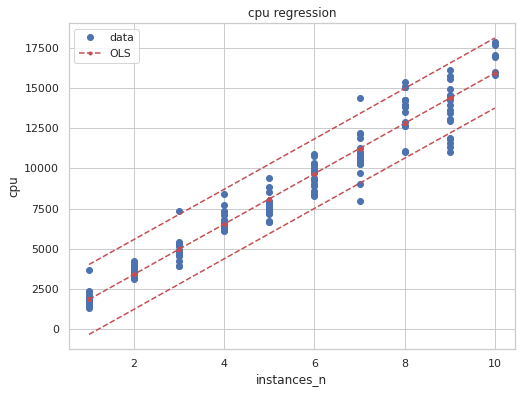

In [42]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')
print(results.summary())

## Sysbench 12x20min

In [43]:
experiment_name = 'sysbench_1_sysbench_11'

path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1./ df['app_throughput']

df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606645079,38.07,26.26,0.038081,526.0,1.483560e+10,1.0
1,1606645132,37.07,26.97,0.037078,552.0,1.482346e+10,1.0
2,1606645185,36.87,27.12,0.036873,542.0,1.400541e+10,1.0
3,1606645238,36.69,27.25,0.036697,554.0,1.400915e+10,1.0
4,1606645291,37.12,26.94,0.037120,545.0,1.400294e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2281.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.33e-152
Time:                        15:16:20   Log-Likelihood:                -1281.5
No. Observations:                 341   AIC:                             2567.
Df Residuals:                     339   BIC:                             2575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.3899      1.218     39.742      

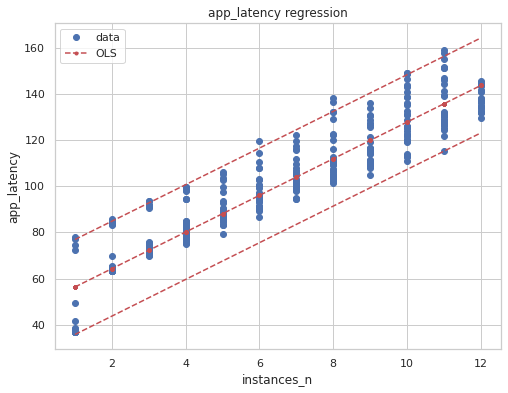

In [44]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     474.9
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.92e-66
Time:                        15:16:24   Log-Likelihood:                -1480.9
No. Observations:                 341   AIC:                             2966.
Df Residuals:                     339   BIC:                             2973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.7342      2.558     19.049      0.0

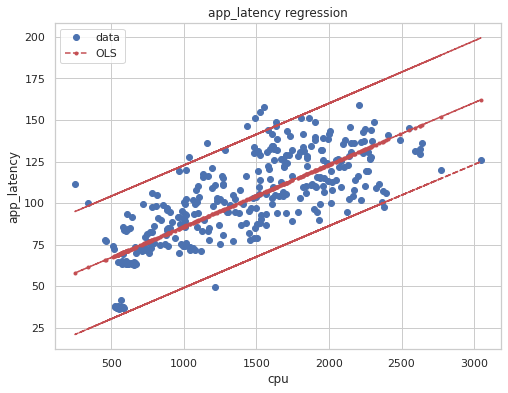

In [45]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [46]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1138.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          6.99e-151
Time:                        15:16:27   Log-Likelihood:                -1281.4
No. Observations:                 341   AIC:                             2569.
Df Residuals:                     338   BIC:                             2580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.7680      1.427     34.167      

### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.27e-74
Time:                        15:16:37   Log-Likelihood:                -852.88
No. Observations:                 341   AIC:                             1710.
Df Residuals:                     339   BIC:                             1717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.5951      0.346     53.679      

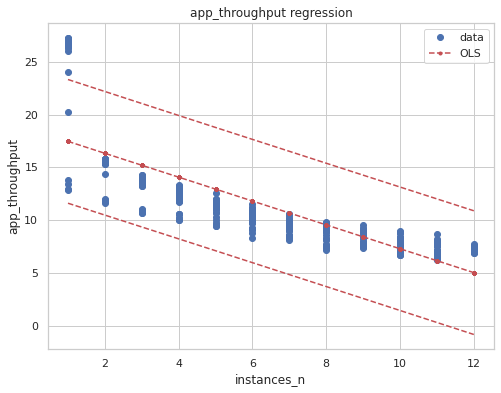

In [47]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     268.1
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           8.35e-45
Time:                        15:16:40   Log-Likelihood:                -921.77
No. Observations:                 341   AIC:                             1848.
Df Residuals:                     339   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.7281      0.496     37.724      0.0

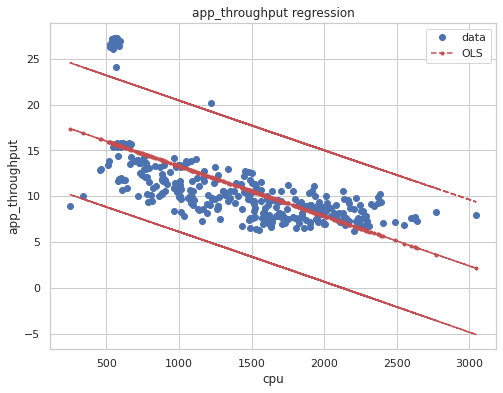

In [48]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')
print(results.summary())

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2281.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.37e-152
Time:                        15:16:45   Log-Likelihood:                 1074.0
No. Observations:                 341   AIC:                            -2144.
Df Residuals:                     339   BIC:                            -2136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0484      0.001     39.744      

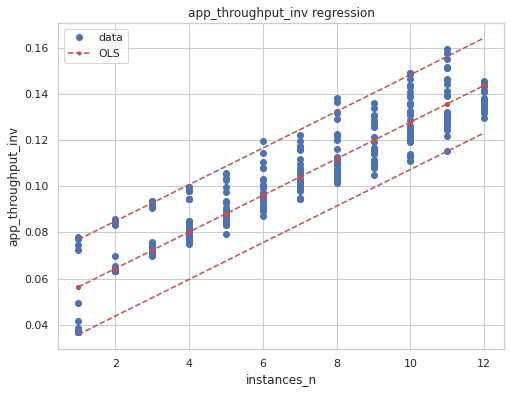

In [49]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     474.8
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.94e-66
Time:                        15:14:08   Log-Likelihood:                 874.62
No. Observations:                 341   AIC:                            -1745.
Df Residuals:                     339   BIC:                            -1738.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0487      0.003     19.051      0.0

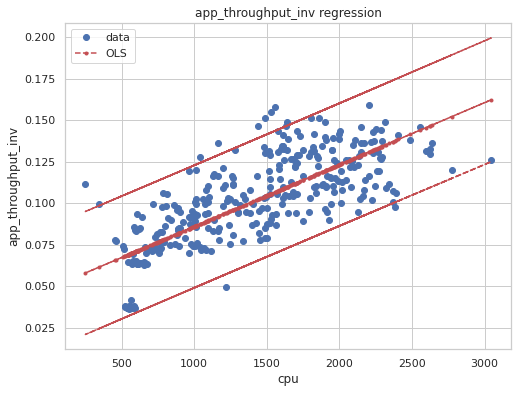

In [35]:
results = fit_regression(data=df, formula='app_throughput_inv ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='cpu')
print(results.summary())

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     720.6
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           6.67e-86
Time:                        15:14:08   Log-Likelihood:                -2466.1
No. Observations:                 341   AIC:                             4936.
Df Residuals:                     339   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     440.5907     39.276     11.218      

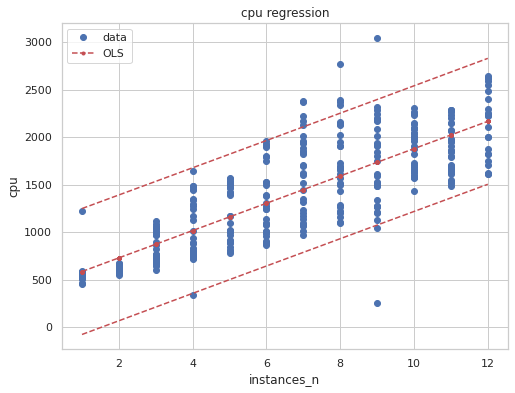

In [36]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')
print(results.summary())